In [1]:
import ROOT
from ROOT import gStyle

Welcome to JupyROOT 6.26/08


In [2]:
myFile_bkg = ROOT.TFile.Open("/Users/bertabeltran/muon_data/data/June8_coin_CH1CH2BoardSwap2/FILTERED/HcompassF_June8_coin_CH1CH2BoardSwap2_20230609_092322.root")

In [3]:
myFile_bkg.ls()

TFile**		/Users/bertabeltran/muon_data/data/June8_coin_CH1CH2BoardSwap2/FILTERED/HcompassF_June8_coin_CH1CH2BoardSwap2_20230609_092322.root	
 TFile*		/Users/bertabeltran/muon_data/data/June8_coin_CH1CH2BoardSwap2/FILTERED/HcompassF_June8_coin_CH1CH2BoardSwap2_20230609_092322.root	
  KEY: TDirectoryFile	Energy;1	Energy
  KEY: TDirectoryFile	Time;1	Time
  KEY: TDirectoryFile	PSD;1	PSD
  KEY: TDirectoryFile	PSD_E;1	PSD_E
  KEY: TTime	RealTime_0;1	object title
  KEY: TTime	LiveTime_0;1	object title
  KEY: TTime	RealTime_1;1	object title
  KEY: TTime	LiveTime_1;1	object title


In [4]:
dir_bkg = myFile_bkg.GetDirectory("Energy");

In [5]:
dir_bkg.ls()

TDirectoryFile*		Energy	Energy
 KEY: TH1D	_F_EnergyCH0@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_0;1	object title
 KEY: TH1D	_F_EnergyCH1@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_1;1	object title


In [6]:
hist_bkg = dir_bkg.Get("_F_EnergyCH0@DT5751_1615;1")

In [7]:
myFile_coin = ROOT.TFile.Open("/Users/bertabeltran/muon_data/data/June13_coin_CH0C_2_CH1B_1/FILTERED/HcompassF_June13_coin_CH0C_2_CH1B_1_20230613_170442.root")
dir_coin = myFile_coin.GetDirectory("Energy");
dir_coin.ls()
hist_coin = dir_coin.Get("_F_EnergyCH0@DT5751_1615")

TDirectoryFile*		Energy	Energy
 KEY: TH1D	_F_EnergyCH0@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_0;1	object title
 KEY: TH1D	_F_EnergyCH1@DT5751_1615;1	
 KEY: CalibrationCoefficient	Calibration_1;1	object title


Info in <TCanvas::Print>: png file /Users/bertabeltran/muon_data/data/BoardC_SiPMs#2.png has been created


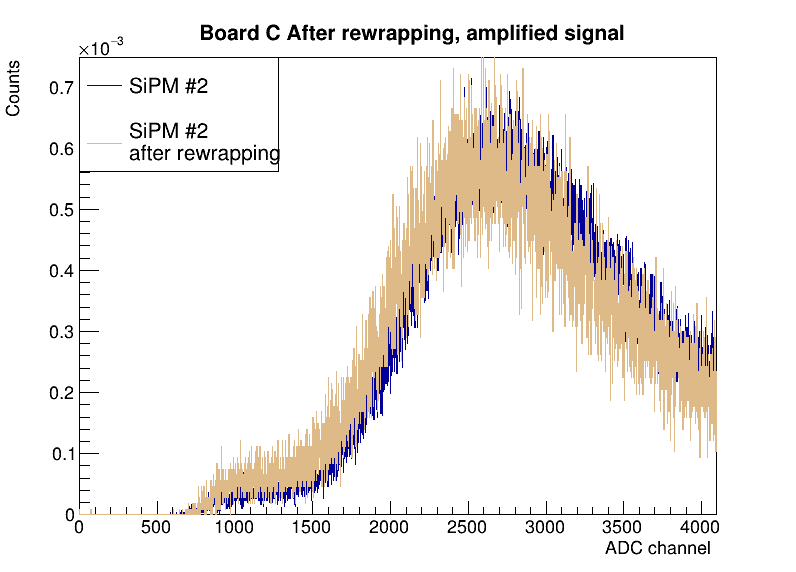

In [8]:

c = ROOT.TCanvas("myCanvasName","Scintillator with waveshifting fibre",800,600)
#hist_bkg.Rebin(4)
#hist_coin.Rebin(4)
hist_bkg.SetFillColor(0)
#hist_bkg.GetYaxis().SetRangeUser(0, 0.05)
hist_bkg.SetNormFactor(1)
hist_bkg.Draw()
hist_bkg.GetYaxis().SetTitleOffset(1.5) #1.2

hist_coin.SetLineColor(42)
hist_coin.SetFillColor(0)
hist_coin.SetNormFactor(1)
hist_coin.Draw("same")
#c.SetLogy()
gStyle.SetOptStat(0)

leg = ROOT.TLegend(.1,.7,.35,.9)
leg.AddEntry(hist_bkg,"SiPM #2 ","L")
leg.AddEntry(hist_coin,"#splitline{SiPM #2}{after rewrapping}","L")
leg.Draw()

tex=ROOT.TLatex(0.25,0.93,"Board C After rewrapping, amplified signal");
tex.SetNDC();
tex.SetTextSize(0.04);
tex.Draw();

c.Draw()
c.SaveAs("/Users/bertabeltran/muon_data/data/BoardC_SiPMs#2.png");